In [6]:
import pandas as pd

df = pd.read_csv("smartphone_cleaned_v5.csv")

In [7]:
print(df.dtypes)

brand_name                    object
model                         object
price                          int64
rating                       float64
has_5g                          bool
has_nfc                         bool
has_ir_blaster                  bool
processor_brand               object
num_cores                    float64
processor_speed              float64
battery_capacity             float64
fast_charging_available        int64
fast_charging                float64
ram_capacity                 float64
internal_memory              float64
screen_size                  float64
refresh_rate                   int64
resolution                    object
num_rear_cameras               int64
num_front_cameras            float64
os                            object
primary_camera_rear          float64
primary_camera_front         float64
extended_memory_available      int64
extended_upto                float64
dtype: object


In [8]:
non_numeric_columns = [
    'brand_name', 'model', 'processor_brand', 'resolution', 'os'
]

df_numeric = df.drop(columns=non_numeric_columns)
df_numeric.corr()

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
price,1.000000,0.283504,0.305066,0.470951,-0.015807,-0.048561,0.474049,-0.159232,0.116739,0.277591,0.386002,0.557168,0.113253,0.244115,0.125330,0.115228,0.092095,0.162995,-0.448628,0.091945
rating,0.283504,1.000000,0.596087,0.474754,0.156421,0.199741,0.628446,-0.015581,0.542814,0.527613,0.757613,0.481070,0.298272,0.610795,0.515531,0.131480,0.562046,0.577861,-0.415265,0.346761
has_5g,0.305066,0.596087,1.000000,0.481702,0.105542,0.139607,0.609583,-0.013237,0.355858,0.440624,0.533957,0.403837,0.230598,0.611794,0.206512,0.058059,0.347918,0.358769,-0.507752,0.392268
has_nfc,0.470951,0.474754,0.481702,1.000000,-0.032541,0.026165,0.609664,-0.106104,0.237947,0.383231,0.458336,0.413071,0.103099,0.410777,0.166299,0.066278,0.131004,0.285427,-0.564380,0.187599
has_ir_blaster,-0.015807,0.156421,0.105542,-0.032541,1.000000,0.120363,0.102744,0.059852,0.174060,0.187605,0.059460,0.030789,0.140809,0.178378,0.198043,-0.011380,0.243608,0.010399,-0.041676,-0.060974
num_cores,-0.048561,0.199741,0.139607,0.026165,0.120363,1.000000,0.192863,0.241289,0.360476,0.115413,0.303911,0.043934,0.385652,0.233010,0.343150,0.047578,0.312394,0.221483,0.072934,0.198742
processor_speed,0.474049,0.628446,0.609583,0.609664,0.102744,0.192863,1.000000,-0.041930,0.345856,0.615657,0.627234,0.525510,0.290366,0.555004,0.255476,0.124191,0.281204,0.398207,-0.663085,0.259733
battery_capacity,-0.159232,-0.015581,-0.013237,-0.106104,0.059852,0.241289,-0.041930,1.000000,0.128993,-0.078096,0.085690,-0.001444,0.348805,0.088636,0.155410,-0.072366,0.171465,-0.005111,0.174683,0.238755
fast_charging_available,0.116739,0.542814,0.355858,0.237947,0.174060,0.360476,0.345856,0.128993,1.000000,NaN,0.439538,0.279877,0.346687,0.415278,0.470952,0.072208,0.427440,0.331769,-0.166626,0.333016
fast_charging,0.277591,0.527613,0.440624,0.383231,0.187605,0.115413,0.615657,-0.078096,NaN,1.000000,0.533602,0.380985,0.258955,0.546374,0.126803,0.012674,0.390718,0.392673,-0.563131,0.026669


In [9]:
df_numeric = df_numeric.dropna()
df_relevant = df_numeric[["price", "rating", "ram_capacity"]]

<Axes: >

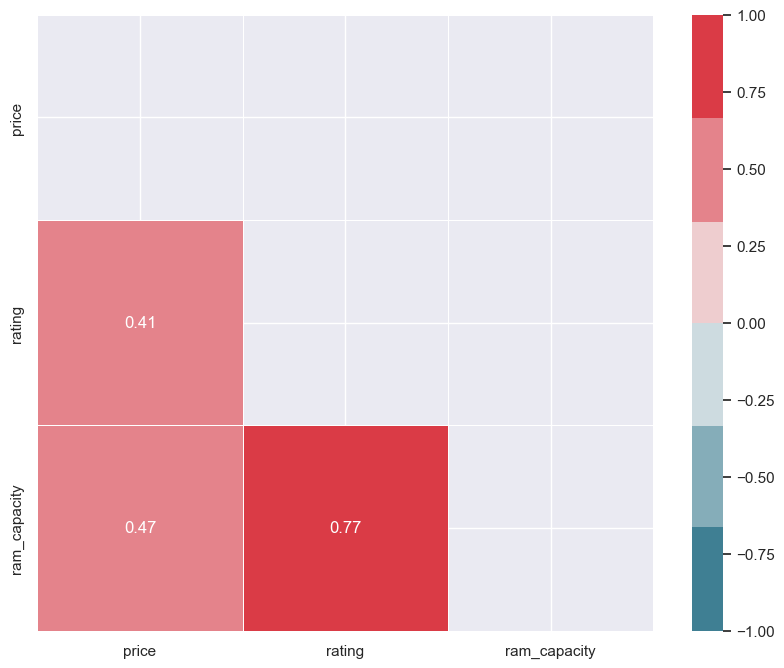

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 8))
corr = df_relevant.corr(method="pearson")

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]=True

cmap = sns.diverging_palette(220, 10)

sns.heatmap(corr, annot=True, cmap=cmap, vmax=1, vmin=-1, 
            mask = mask, center=0, square=True, linewidth=0.5) #cbar_kws={"shrink" : 0.5})

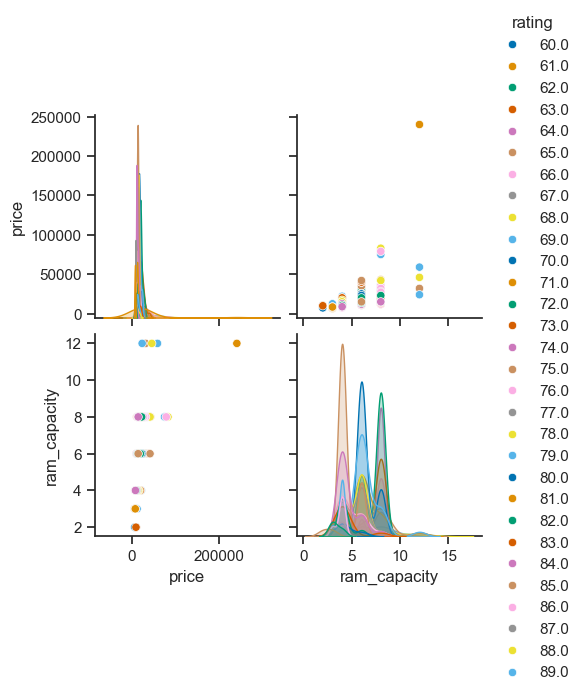

In [11]:
x = df_relevant
y = df_relevant.rating

sns.set(style = "ticks")
sns.pairplot(df_relevant, hue="rating", palette="colorblind")

## Recursive Feature Elimination

Agora usaremos uma modelo de Eliminação Recursiva de Feature para determinar quais são realmente as features mais relevantes

In [12]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_numeric.drop("rating", axis=1)
Y = df_numeric["rating"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

estimator = RandomForestClassifier(random_state=42)

selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train, Y_train)

print("Features selecionadas: ", X_train.columns[selector.support_])
print("Ranking das Features: ", selector.ranking_)



Features selecionadas:  Index(['price', 'processor_speed', 'fast_charging', 'screen_size',
       'primary_camera_rear'],
      dtype='object')
Ranking das Features:  [ 1  9 11 10 13  1  5 15  1  2  8  1  4  6 12  1  3 14  7]


In [13]:
df_rel = df_numeric[["price", "processor_speed", "fast_charging", "screen_size", "primary_camera_rear"]]

In [14]:
from mrmr import mrmr_classif
import pandas as pd

selected_features = mrmr_classif(pd.DataFrame(X), pd.Series(Y), K=10)

100%|██████████| 10/10 [00:00<00:00, 25.35it/s]


In [15]:
selected_features

['ram_capacity',
 'battery_capacity',
 'num_cores',
 'primary_camera_rear',
 'has_nfc',
 'primary_camera_front',
 'processor_speed',
 'num_rear_cameras',
 'internal_memory',
 'has_5g']

## Relief

In [19]:
import sklearn_relief as relief

fs = relief.ReliefF(n_features=3)
X_train = fs.fit_transform(df_numeric.drop("rating", axis=1).reset_index(), df_numeric["rating"].reset_index())

print("No de tuplas, No de colunas antes do relief: ", df.shape)
print("No de tuplas, No de colunas após o relief: ", X_train.shape)

KeyError: (119, 0)

Obtivemos erro na forma que o SKLearn relief tenta acessar o dataframe, não sabemos como corrigir isso.